# Imports (do NOT change/add)

In [1]:
import operator

import csv
import statistics as stats
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Wine Dataset
Loading/analyzing a subset of the [wine dataset](http://archive.ics.uci.edu/ml/datasets/Wine)
* Overlay histograms of the two features (alcohol, ascalinity)
* Output count of points, as well as mean & sample standard deviation of the features

In [2]:
alcohol = []
ascalinity = []

with open('wine_data.csv', "r") as csvfile:
    for row in csv.reader(csvfile):
        alcohol.append(float(row[0]))
        ascalinity.append(float(row[1]))
        
data = list(zip(alcohol, ascalinity))

Alcohol: mean=13.00062, std=0.81183
Ascalinity: mean=19.49494, std=3.33956


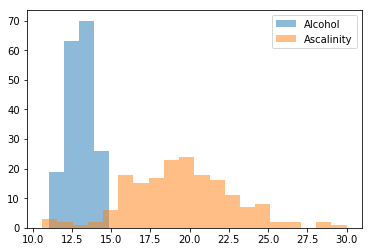

In [3]:
# TODO
# 1. Overlay histograms of the two features (alcohol, ascalinity)
bins = 20
plt.hist(alcohol, int(bins/5), alpha=0.5, label='Alcohol')
plt.hist(ascalinity, bins, alpha=0.5, label='Ascalinity')
plt.legend(loc='upper right')

# 2. Output count of points, as well as mean & sample standard deviation of the features
print("Alcohol: mean={:.5f}, std={:.5f}".format(stats.mean(alcohol), stats.stdev(alcohol)))
print("Ascalinity: mean={:.5f}, std={:.5f}".format(stats.mean(ascalinity), stats.stdev(ascalinity)))


# 2. Distance Metrics
* Implement the sse function and the general minkowski distance function

In [4]:
# TODO
# returns the sum-squared-error between two points
def sse(x1, x2):
    e = (((x2[0]-x1[0])**2) + ((x2[1]-x1[1])**2))
    return e

In [63]:
# TODO
# returns the minkowski distance between x1 and x2
def minkowski_distance(x1, x2, q):
    d = ((abs((x2[0]-x1[0])**q) + abs((x2[1]-x1[1])**q))**(1/q))
    return d

In [6]:
# returns the L2 distance from x1 to x2
def euclidean_distance(x1, x2):
    return minkowski_distance(x1, x2, 2)

In [7]:
# returns the L1 distance from x1 to x2
def manhattan_distance(x1, x2):
    return minkowski_distance(x1, x2, 1)

In [106]:
t1 = [0,0]
t2 = [3,4]

print("SSE {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, sse(t1, t2), 25.))

print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, euclidean_distance(t1, t2), 5.))
print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, euclidean_distance(t2, t1), 5.))

print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, manhattan_distance(t1, t2), 7.))
print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, manhattan_distance(t2, t1), 7.))

SSE [0, 0] -> [3, 4] = 25.00000, expected=25.00000
Euclidean [0, 0] -> [3, 4] = 5.00000, expected=5.00000
Euclidean [3, 4] -> [0, 0] = 5.00000, expected=5.00000
Manhattan [0, 0] -> [3, 4] = 7.00000, expected=7.00000
Manhattan [3, 4] -> [0, 0] = 7.00000, expected=7.00000


# 3. K-Means
* Implement choose_cluster (find the closest centroid w.r.t. a distance metric)
* Implement k-means
* Respond to a question regarding plotted clusterings

In [98]:
# TODO
def new_Centroids(cluster_data):    
    l = []
    for k in cluster_data:
        l.append(cluster_data[k])
    l = list(set(l))
    
    k_cen = []
    for i in l:
        temp = []
        for k in cluster_data:
            if(cluster_data[k] == i):
                temp.append(k)
        k_cen.append(temp)
    
    new_cent = []
    for element in k_cen:
        x = [p[0] for p in element]
        y = [p[1] for p in element]
        new_cent.append((stats.mean(x),stats.mean(y)))  
    return new_cent


# SSE Calculation
def sse_cal(centroid, data, distance_metrics):
    d = []
    for point in data:
        d.append(distance_metrics(point,centroid))        
    return sum(d)
         

In [107]:
# TODO
# Inputs: 
#  initial_centroids: locations (length=K)
#  data: data points (length=N)
#  distance_metric: how to select the closest point in the e-step
# 
# Outputs:
#  centroids: locations (length=K)
#  new_clusters: for each data point, index of associated cluster
#  iterations: count of iterations taken
#  total_sse: SSE of final clustering
def kmeans(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    n_centroids = []
    iterations = 0
    total_sse = 0
    for i in range(100):     
        clu = {}
        clu_list = []
        for point in data:
            dis = []
            count = 0
            for element in centroids:  
                dis.append((count,point,distance_metric(element,point)))
                count += 1
            m = min(dis, key = lambda t: t[2])
            clu_list.append(m[0])
            clu[m[1]] = m[0]
   
        n_centroids = new_Centroids(clu)
        iterations += 1
        
        if(centroids == n_centroids):
            total_sse = []
            for i in range(len(n_centroids)):
                total_sse.append(sse_cal(n_centroids[i], [p for p,v in clu.items() if i == v], distance_metric))
            return n_centroids, clu_list, iterations, sum(total_sse)
        else:
            centroids = n_centroids
        

In [108]:
def cluster_plot(centroids, data, clustering):
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)

In [109]:
initial_centroids = [data[175], data[25], data[67]]

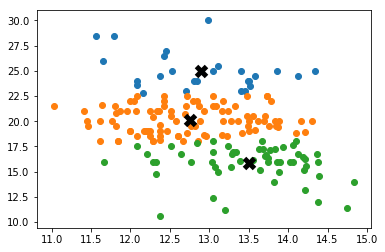

In [110]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, euclidean_distance)
cluster_plot(centroids, data, clustering)

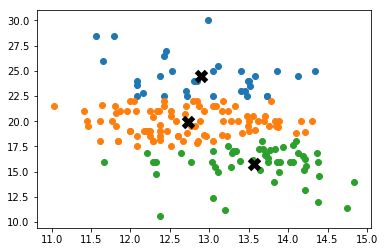

In [111]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, manhattan_distance)
cluster_plot(centroids, data, clustering)

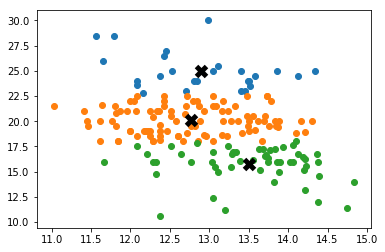

In [112]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, lambda x,y: minkowski_distance(x, y, 3))
cluster_plot(centroids, data, clustering)

## Q: What conclusion can you draw from these plots?

Number of the data points in a cluster are changing based on the distance metric used. Maily for the points near to the borders of the clusters.

# 4. Choosing K
* Runs several trials of K-Means with different initial points (Forgy), recording SSE
* Plot SSE vs K
* Respond to the question below

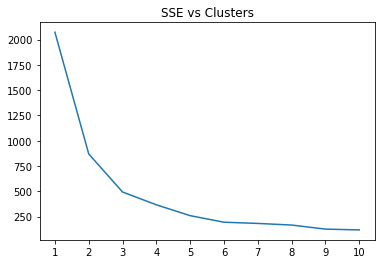

In [114]:
max_clusters = 10
trials = 5

clusters = []
sses = []

random.seed(8675309)

# TODO
# 1. Perform 5 trials (randomizing initial points ala Forgy) for each of K=1, 2, ... 10
# 2. Plot SSE vs K

def choosing_K(data,distance_metric):
    total_sse = []
    for i in range(max_clusters):
        clusters.append(i+1)
        for j in range(trials):
            c_sse = []
            random.shuffle(data)
            centroids = data[0:i+1]
            _, _, _, sse = kmeans(centroids, data, distance_metric)
            c_sse.append(sse)
        total_sse.append(stats.mean(c_sse))
    return(total_sse)

sses = choosing_K(data,euclidean_distance)


    
plt.plot(clusters, sses)
plt.xticks(range(1, len(clusters)+1, 1))
plt.title('SSE vs Clusters')

## Q: What is a reasonable value for K based upon this data -- why?

As we can see from the above, best value for the k would be 6 after which there is no much decrease in the SSE as we increase the K value.
